### importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### The steps to be followed for analysis :-

1. Reading, Understanding and Visualising the data (EDA)
2. Preparing the data for modeling
3. Building & Training the model
4. Residual Analysis
5. Make Predictions
6. Model Evaluation

## Step 1: Reading, Understanding and Visualising the data (EDA)

In [2]:
# Read the Bike Sharing data
bikeSharing = pd.read_csv("day.csv")
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check no. of records and columns
bikeSharing.shape

(730, 16)

****The above result shows that total 730 rows and 16 columns present****

In [4]:
# Check information about dataframe, understand any missing rows and datatypes
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


****The above results shows that there is no missing data so no need to impute any records****

In [5]:
# Check summary of numerical variables present in dataframe
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



Dataset characteristics provided
===========================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    

### a) Columns to mapped as per the attribute characteristics shown below:
    - season
    - mnth
    - weekday
    - weathersit 


In [6]:
# Season mapping
bikeSharing['season'] = bikeSharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Month mapping
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                        9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# weekday mapping
bikeSharing['weekday'] = bikeSharing['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

# weathersit mapping
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})

### b) Rename the columns for better readability

In [7]:
bikeSharing.rename(columns={'yr':'Year', 'mnth':'Month', 'hum':'Humidity', 'cnt':'Count'},
                   inplace=True)
bikeSharing.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### c) Visualising the numerical variables using pairplot

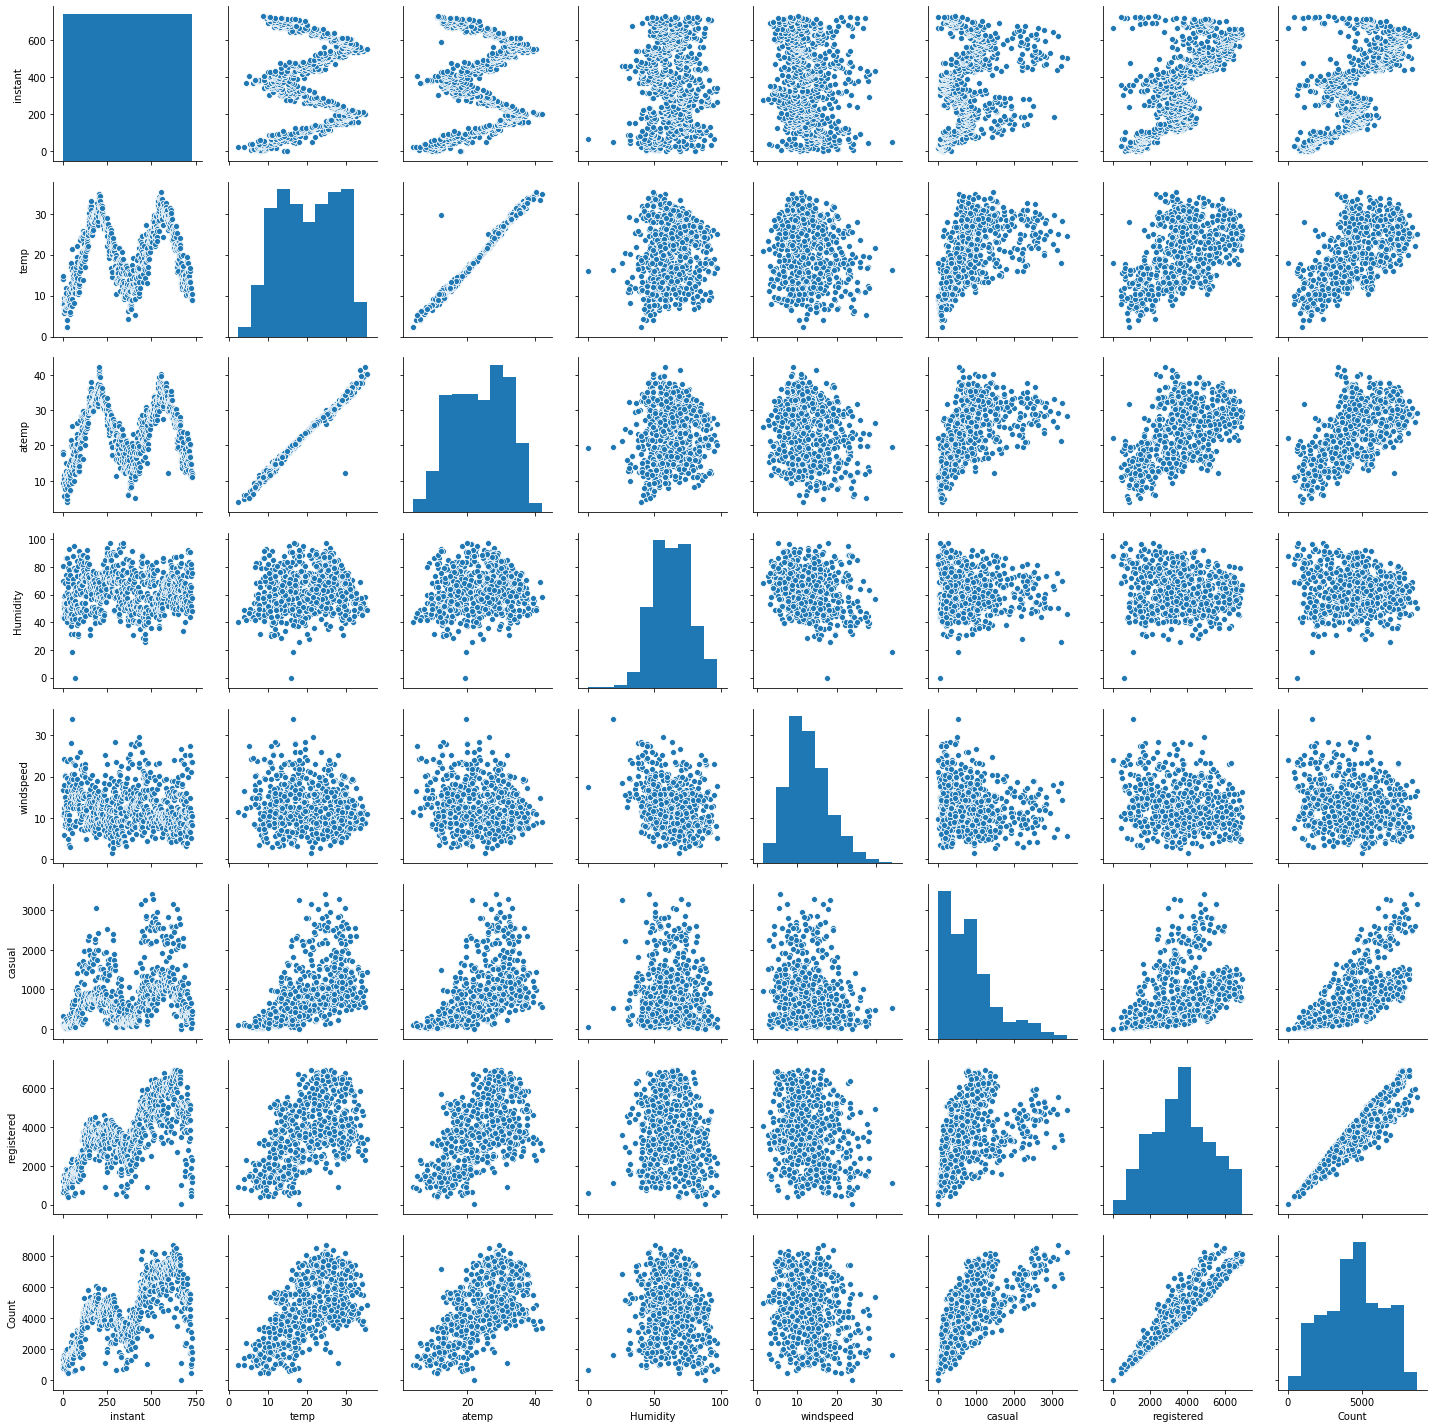

In [8]:
# plotting using pairplot
num_vars = ['instant', 'temp', 'atemp', 'Humidity', 'windspeed', 'casual', 'registered' , 'Count']
sns.pairplot(bikeSharing, vars=num_vars)
plt.show()

****The above plot shows that the attribute "temp" is correlated with Bike Rentals****

### d) Visualising the categorical variables using boxplot

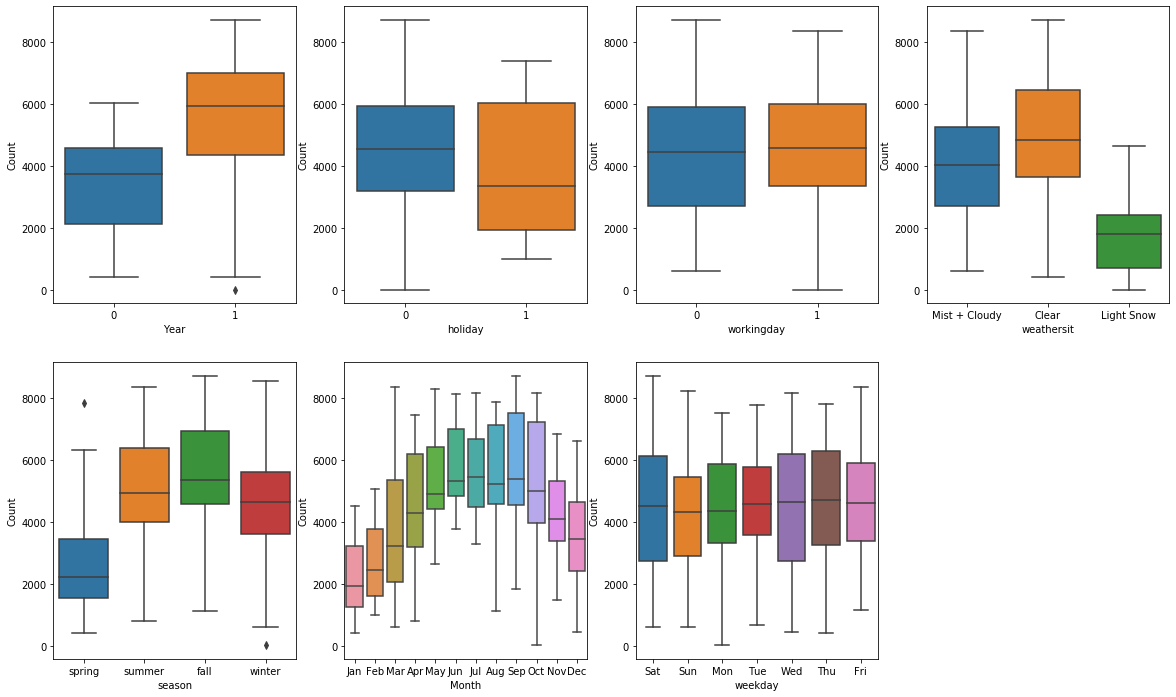

In [9]:
# plotting using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='Year', y='Count', data=bikeSharing)

plt.subplot(2, 4, 2)
sns.boxplot(x='holiday', y='Count', data=bikeSharing)

plt.subplot(2, 4, 3)
sns.boxplot(x='workingday', y='Count', data=bikeSharing)

plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='Count', data=bikeSharing)

plt.subplot(2, 4, 5)
sns.boxplot(x='season', y='Count', data=bikeSharing)

plt.subplot(2, 4, 6)
sns.boxplot(x='Month', y='Count', data=bikeSharing)

plt.subplot(2, 4, 7)
sns.boxplot(x='weekday', y='Count', data=bikeSharing)

plt.show()

- The above plot shows below :-
    - Bike Rentals are more in the year 2019 compared to 2018
    - Bike Rentals are more in clear weather
    - Bike Rentals are more during fall season
    - Bike Rentals are more on Saturday, Wednesday & Thursday
    
****The above pair plot and scatter plot provides the insights for both numerical and categorical variables. Quickly analysing these varaibles with respect to count to visualize better****

#### 1. Season

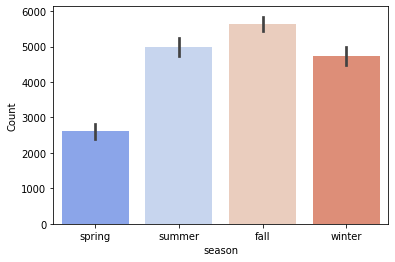

In [10]:
# Check relation between season and count
sns.barplot(x='season',y='Count',data=bikeSharing,palette="coolwarm",)
plt.show()

****The bike rentals are more during fall season compared to summer, winter & spring****

#### 2. Month

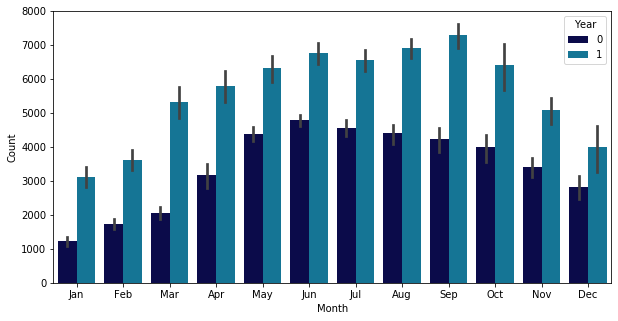

In [11]:
# Check relation betweem month and count
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Count',hue='Year',data=bikeSharing,palette='ocean')
plt.show()

****The bike rentals are more during 2019 compared to 2018****

#### 3. Weathersit

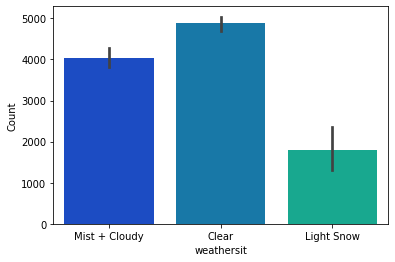

In [12]:
# Check relation between weathersit & count
sns.barplot(x='weathersit',y='Count',data=bikeSharing,palette='winter')
plt.show()

****The bike rentals are more during Clear weather compared to Mist + Cloudy & Light Snow****

#### 4. Temperature

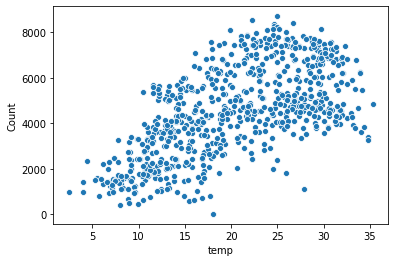

In [13]:
# Check relation between temp & Count
sns.scatterplot(x='temp',y='Count' ,data=bikeSharing)
plt.show()

****The bike rentals are more during high temperature period****

#### 5. Humidity

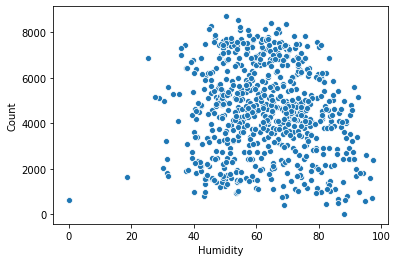

In [14]:
# Check the relation between humidity & Count
sns.scatterplot(x='Humidity', y='Count',data=bikeSharing)
plt.show()

****The bike rentals are more during high humidity period****

### e)  Find Correlation between variables using Heatmap

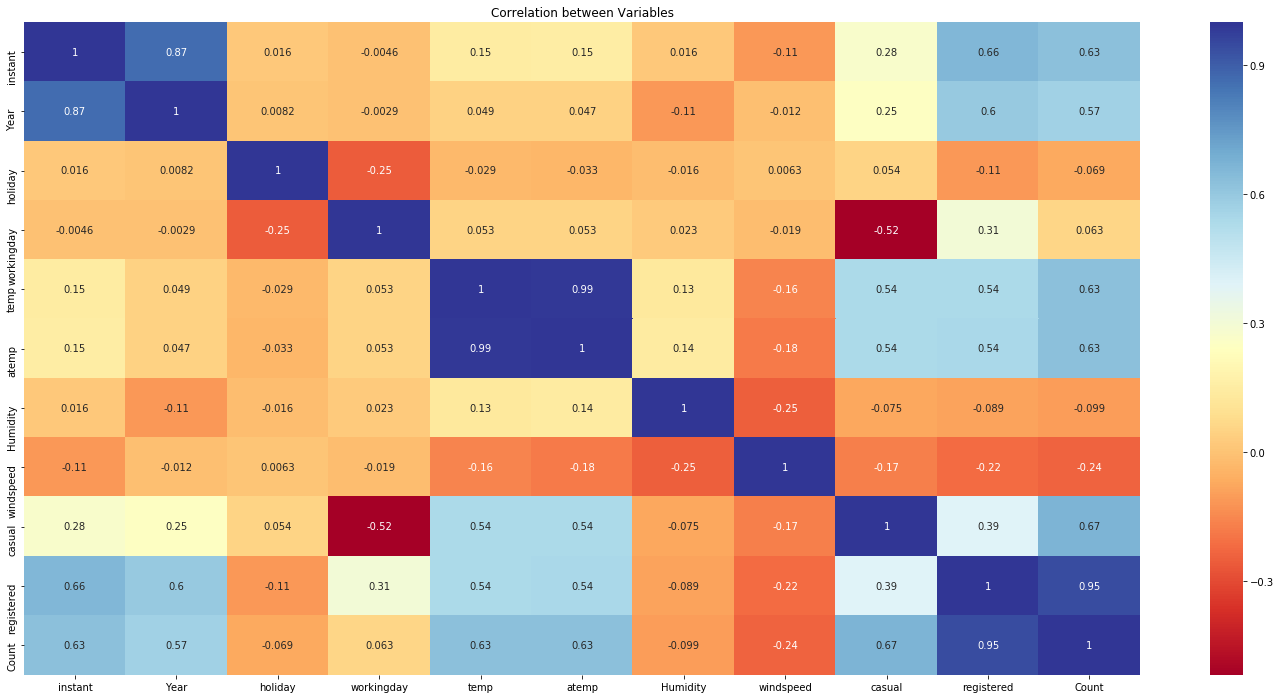

In [15]:
# Correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bikeSharing.corr(), cmap='RdYlBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

***The above heat map shows that temp, atemp, casual,registered,instant variables are correlated with 'count' variable. So, this can be explained using Linear Regression Model***


## Step 2: Preparing the data for modeling


#### Steps to be followed:-

- Encoding
    - Converting binary categorical variables
    - Converting other categorical variables into dummy variables
- Splitting into training and test
- Rescaling of variables

### a) Drop the unnecessary columns

In [16]:
#drop unnecessary columns
bikeSharing=bikeSharing.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bikeSharing.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,Humidity,windspeed,Count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### b) Create Dummy variables

In [17]:
# Create dummy variables
months = pd.get_dummies(bikeSharing['Month'], drop_first=True)
weekdays = pd.get_dummies(bikeSharing['weekday'], drop_first=True)
weatherSit = pd.get_dummies(bikeSharing['weathersit'], drop_first=True)
seasons = pd.get_dummies(bikeSharing['season'], drop_first=True)

In [18]:
bikeSharing=pd.concat([months,weekdays,weatherSit,seasons,bikeSharing],axis=1)
bikeSharing.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Year,Month,holiday,weekday,workingday,weathersit,temp,Humidity,windspeed,Count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [19]:
# Drop the columns since dummy variables are created
bikeSharing.drop(['season','Month','weekday','weathersit'], axis = 1, inplace = True)
bikeSharing.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,Humidity,windspeed,Count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [20]:
# Check the number of rows and columns
bikeSharing.shape

(730, 29)

### c) Split the data into train and test set

In [21]:
# Split into train & test set
bike_train, bike_test = train_test_split(bikeSharing, train_size = 0.7, random_state = 100)

In [22]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### d) Rescaling the Features

Two types:-

1. Min-Max scaling (normalisation) - compress the values between 0 & 1
2. Standardisation (mean=0, sigma=1)

In [23]:
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables that are not in binary form (0 & 1)
num_vars = ['temp', 'Humidity', 'windspeed', 'Count']

# Fit on the data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,Humidity,windspeed,Count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [24]:
# summary statistics of the numerical variables
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,Humidity,windspeed,Count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


****All the numerical variables are now between 0 & 1. The data is now ready to fit in the 
Regression Model****

## Step 3: Building & Training the Linear Model

In [25]:
# Split data into X & y sets for model building
y_train = bike_train.pop('Count')

X_train = bike_train

### a) Recursive Feature Elimination

In [26]:
# Execute RFE with output number of variables = 15
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [27]:
# list the variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1)]

In [28]:
# List the columns that has RFE support as True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'Jul', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'Humidity',
       'windspeed'],
      dtype='object')

In [29]:
# List the columns that has RFE support as False
col_not = X_train.columns[~rfe.support_]
col_not

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### b) Build the model using Statsmodel

In [30]:
# Create dataframe using RFE variables
X_train_rfe = X_train[col]

# build a model with all the variables
X_train_rfe = sm.add_constant(X_train_rfe)

# create first model
lr = sm.OLS(y_train, X_train_rfe)

# fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          4.22e-191
Time:                        18:34:52   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
Year              0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
Humidity         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Compute Variance Inflation Factor (VIF)

- The VIF is calculated using the below formula <br>
VIF = 1 / (1-R^2)

In [31]:
#Drop the intercept 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# create a dataframe that will contain the names of all the feature variables 
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
13,Humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,Year,2.09
3,Sat,1.98


***Observation:- The attribute "January" has high p-value and low VIF. so January can be dropped***

#### Rebuild the model without "January"

In [32]:
# Drop January
X_train_sm = X_train_rfe.drop(["Jan"], axis = 1)

X_train_sm = sm.add_constant(X_train_sm)
lr_model1 = sm.OLS(y_train,X_train_sm).fit()
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          2.11e-191
Time:                        18:34:52   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [33]:
#Drop the intercept 
X_train_sm = X_train_sm.drop(['const'], axis=1)

# create a dataframe that will contain the names of all the feature variables 
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
12,Humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,Year,2.08
2,Sat,1.97


***Observation:- The attribute "Humidity" has high VIF and therefore it is insignificant and can be dropped***

#### Rebuild the model without "Humidity"

In [34]:
# Drop Humidity
X_train_sm1 = X_train_sm.drop(["Humidity"], axis = 1)

X_train_sm1 = sm.add_constant(X_train_sm1)
lr_model2 = sm.OLS(y_train,X_train_sm1).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          1.28e-188
Time:                        18:34:53   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

In [35]:
#Drop the intercept 
X_train_sm1 = X_train_sm1.drop(['const'], axis=1)

# create a dataframe that will contain the names of all the feature variables 
vif = pd.DataFrame()
vif['features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
5,spring,2.49
6,summer,2.34
8,Year,2.07
7,winter,1.98
2,Sat,1.96
0,Jul,1.58
4,Mist + Cloudy,1.57


***Observation:- The attribute "holiday" has high p-value and low VIF and therefore it is insignificant and can be dropped***

#### Rebuild the model without "holiday"

In [36]:
# Drop holiday
X_train_sm2 = X_train_sm1.drop(["holiday"], axis = 1)

X_train_sm2 = sm.add_constant(X_train_sm2)
lr_model3 = sm.OLS(y_train,X_train_sm2).fit()
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          7.12e-189
Time:                        18:34:53   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [37]:
#Drop the intercept 
X_train_sm2 = X_train_sm2.drop(['const'], axis=1)

# create a dataframe that will contain the names of all the feature variables 
vif = pd.DataFrame()
vif['features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,Year,2.07
7,winter,1.91
2,Sat,1.83
0,Jul,1.58
4,Mist + Cloudy,1.57


***Observation:- The attribute "windspeed" has high VIF and has negative correlation with target variable "count". Therefore it is insignificant and can be dropped***

#### Rebuild the model without "windspeed"

In [38]:
# Drop windspeed
X_train_sm3 = X_train_sm2.drop(["windspeed"], axis = 1)

X_train_sm3 = sm.add_constant(X_train_sm3)
lr_model4 = sm.OLS(y_train,X_train_sm3).fit()
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          1.94e-182
Time:                        18:34:53   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248

In [39]:
#Drop the intercept 
X_train_sm3 = X_train_sm3.drop(['const'], axis=1)

# create a dataframe that will contain the names of all the feature variables 
vif = pd.DataFrame()
vif['features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
10,temp,6.03
9,workingday,4.63
8,Year,2.07
6,summer,2.06
2,Sat,1.81
5,spring,1.78
7,winter,1.73
0,Jul,1.58
4,Mist + Cloudy,1.57
1,Sep,1.34


***Observation:- The attribute "Jul" has low VIF and has negative correlation with target variable "count". Therefore it is insignificant and can be dropped***

#### Rebuild the model without "Jul"

In [40]:
# Drop July
X_train_sm4 = X_train_sm3.drop(["Jul"], axis = 1)

X_train_sm4 = sm.add_constant(X_train_sm4)
lr_model5 = sm.OLS(y_train,X_train_sm4).fit()
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          3.10e-182
Time:                        18:34:53   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964

In [41]:
#Drop the intercept 
X_train_sm4 = X_train_sm4.drop(['const'], axis=1)

# create a dataframe that will contain the names of all the feature variables 
vif = pd.DataFrame()
vif['features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
9,temp,4.72
8,workingday,4.63
7,Year,2.07
1,Sat,1.81
5,summer,1.75
4,spring,1.70
6,winter,1.59
3,Mist + Cloudy,1.57
0,Sep,1.23
2,Light Snow,1.07


***Final Observation:- From the above, we could see that both p-value and VIF are within acceptable range. These variables are ideal for making predictions and model is ready.***

### Findings:-

#### 1) A low p-value ie, < 0.05 shows that we can reject the null hypothesis.
#### 2) The VIF values is below 5 (< 5) shows there multicollinearity between variables is less
#### 3) The R-squared value is 0.826 or 82.6% indicates that strength of relationship between   dependent variable & model is good.
#### 4) The Adj. R-squared value is 0.822 or 82.2%

## Step 4: Residual Analysis

In [42]:
X_train_sm4 = sm.add_constant(X_train_sm4)
X_train_sm4

,const,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp
576,1.0,0,0,0,0,0,0,0,1,1,0.815169
426,1.0,0,1,0,1,1,0,0,1,0,0.442393
728,1.0,0,0,0,0,1,0,0,1,0,0.245101
482,1.0,0,1,0,1,0,1,0,1,0,0.395666
111,1.0,0,0,0,1,0,1,0,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,1,0.863973
53,1.0,0,0,0,0,1,0,0,0,1,0.202618
350,1.0,0,1,0,1,0,0,1,0,0,0.248216
79,1.0,0,0,0,1,0,1,0,0,1,0.462664


In [43]:
# predicted y train
y_train_pred = lr_model5.predict(X_train_sm4)

<Figure size 432x288 with 0 Axes>

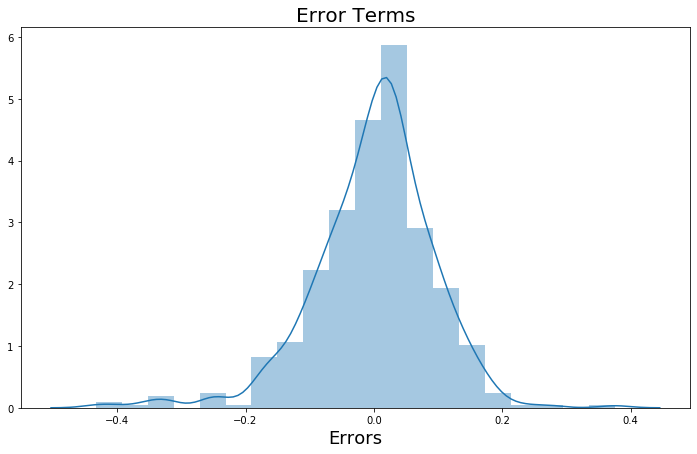

In [44]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(12,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

****The above plot shows that error terms are normally distributed****

## Step 5: Make Predictions

In [45]:
# Scaling the test variables
#List of numeric variables
num_vars=['temp','Humidity','windspeed','Count']

#Fit
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,Humidity,windspeed,Count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [46]:
#Divide variables into X_test and y_test
y_test = bike_test.pop('Count')

X_test = bike_test

X_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,Humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


#### Use model to perform predictions on the test sets

In [47]:
# Creating X_test_sm dataframe by dropping variables from X_test
X_train_sm4 = X_train_sm4.drop(['const'], axis=1)
X_test_sm = X_test[X_train_sm4.columns]

# X_train_sm4.columns
# 
# Add constant  
X_test_sm1 = sm.add_constant(X_test_sm)
X_test_sm1.head()

,const,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp
184,1.0,0,0,0,1,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,0,0,1,0,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,1,0,0,1,0.817246


In [48]:
# Make prediction with test set
y_pred = lr_model5.predict(X_test_sm1)

#### Calculate R-Squared

In [49]:
r2_score(y_test, y_pred)

0.8115083592040953

#### Calculate Adjusted R-Square

In [50]:
#Formula for adj r2=1-(1-R2)*(n-1)/(n-p-1)
Adjusted_r2=1-(1-0.811508)*(11-1)/(11-1-1)
print(Adjusted_r2)

0.7905644444444444


## Step 6: Model Evaluation

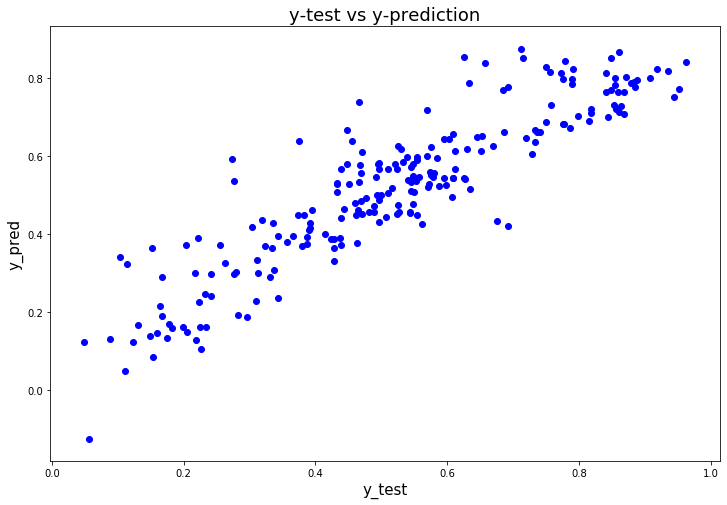

In [51]:
# Plotting y_test and y_pred to get idea about data distribution
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,color='blue')
plt.title('y-test vs y-prediction', fontsize=18)              
plt.xlabel('y_test', fontsize=15)                         
plt.ylabel('y_pred', fontsize=15)   
plt.show()

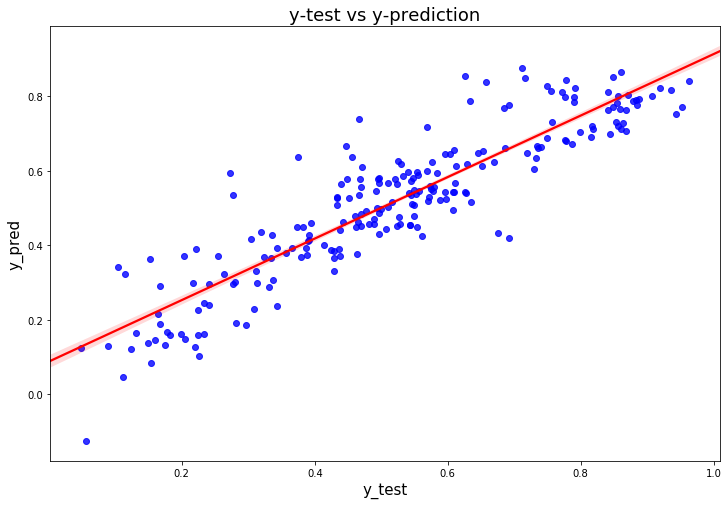

In [52]:
#Regression plot
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y-test vs y-prediction', fontsize=18)              
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred', fontsize=15)                          
plt.show()

In [54]:
# The equation of the best fitted line
count=0.4914×temp+0.0916×September+0.0645×Saturday+0.0527×summer+0.0970×winter+0.2334×Year+0.0566×workingday−0.03041×lightsnow−0.0786×mistcloudy−0.065×spring

***Comparison between Train & Test Model***

- Train Model
    - R-Squared = 0.826 or 82.6%
    - Adjusted R-Squared = 0.822 or 82.2%

- Test Model
    - R-Squared = 0.811 or 81.1%
    - Adjusted R-Squared = 0.791 or 79.1%

- R-Squared difference between Train & Test is 1.5%
- Ajusted R-Squared difference between Train & Test is 3.1%

***The above comparison clearly shows that this is a good model***

## Model Interpretation:
*********************************

#### 1) It is observed that temperature variables is showing highest coefficient of 0.4914. This means that if the temperature increases by 1 unit, the number of bike rentals increases by 0.4914.
#### 2) There are other variables such as Light Snow, Mist + Cloudy, Spring that are negatively coefficient. This means that mean of the dependent variables changes for a given 1 unit shift in the independent variables. 


## Business Goal:
*********************************

#### 1) A US bike-sharing provider "BoomBikes" has to focus on temperature to get more revenue on bike rentals.
#### 2) We see more bike rentals during 2019 compared to 2018. so demand is increasing year wise. so, once Corona pandemic ends, situation will be better.
#### 3) BookBikes can focus more rentals during summer and winter season, month of August & September, mostly during weekends and working days.
#### 4) By looking at weathersit, ight Snow, Mist + Cloudy, Spring that are negatively coefficient, so any good offers to customers might create slightly increase in rentals.
#### 5) Bike rentals is showing negative coefficients, so good offers might create slightly increase in rentals.